##### All basic libraries we have to install first !!!

In [9]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline # with this command there is no need to type plt.show again n again 
import seaborn as sns
print("Setup Complete")

UsageError: unrecognized arguments: # with this command there is no need to type plt.show again n again


In [10]:
#Reading all csv files
april=pd.read_csv("C:/Users/Frac/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")
jan=pd.read_csv("C:/Users/Frac/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_January_2019.csv")
Feb=pd.read_csv("C:/Users/Frac/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_February_2019.csv")
March=pd.read_csv("C:/Users/Frac/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_March_2019.csv")
May=pd.read_csv("C:/Users/Frac/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_May_2019.csv")
June=pd.read_csv("C:/Users/Frac/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_June_2019.csv")
July=pd.read_csv("C:/Users/Frac/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_July_2019.csv")
Aug=pd.read_csv("C:/Users/Frac/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_August_2019.csv")
Sep=pd.read_csv("C:/Users/Frac/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_September_2019.csv")
Oct=pd.read_csv("C:/Users/Frac/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_October_2019.csv")
Nov=pd.read_csv("C:/Users/Frac/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_November_2019.csv")
Dec=pd.read_csv("C:/Users/Frac/Downloads/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_December_2019.csv")


##### Now we have to concat these csv files int one row wise where axis = 0

In [11]:
# after reading all the data lets concat into one dataframe

data=pd.concat((jan,Feb,March,april,May,June,July,Aug,Sep,Oct,Nov,Dec),axis=0)
data.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


##### Now next step is the DATA Cleansing  by dropping down all the Nan values of the rows


In [12]:
data=data.dropna()
data.isnull().any()

data.head(10)



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


##### One of the most imp step here we change the column data type for performing diff functions for further steps

In [13]:

data=data[data["Price Each"]!= "Price Each"] # execute because of the error
data["Price Each"]=data["Price Each"].astype("float32")
data["Quantity Ordered"]=data["Quantity Ordered"].astype("int32")
data["Order Date"]=data["Order Date"].astype("<M8[ns]")
data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float32
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

###### New columns which we want to add in our datasets 

In [227]:
TP=data["Price Each"]*data["Quantity Ordered"]
data["Total Price"]=TP
#data.insert(4,"sales",TP) #alternative method
data["Month"]=pd.DatetimeIndex(data["Order Date"]).month #use to extract the month from the order date column


# now giving the name of the month by def a function
def m(pd):
    if pd.Month == 1:
        return "January"
    elif  pd.Month == 2 :
        return "February"
    elif  pd.Month == 6:
        return "June"
    elif pd.Month == 3:
        return "March"
    elif  pd.Month == 4:
        return "April"
    elif  pd.Month == 5:
        return "may"
    elif  pd.Month == 7:
        return "July"
    elif  pd.Month == 8:
        return "August"
    elif  pd.Month == 9:
        return "September"
    elif  pd.Month == 10:
        return "October"
    elif  pd.Month == 11 :
        return "November"
    else:
        return "December"
    
data["Month Name"]=data.apply(m,axis=1)
data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Month,Month Name
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.000000,1,January
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.950000,1,January
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.980000,1,January
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.990005,1,January
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.990000,1,January
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.950000,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.950000,12,December
25113,319667,AA Batteries (4-pack),2,3.840000,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.680000,12,December
25114,319668,Vareebadd Phone,1,400.000000,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.000000,12,December
25115,319669,Wired Headphones,1,11.990000,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.990000,12,December


####  1- heres the 1st question which month has maximum sales ?

In [228]:
sale=data.groupby("Month Name").sum().sort_values(by="Total Price" , ascending=False)
sale

,Quantity Ordered,Price Each,Total Price,Month
Month Name,,,,
December,28114,4588415.500,4613443.50,299808
October,22703,3715554.750,3736726.75,202820
April,20558,3367671.000,3390670.25,73116
November,19798,3180600.750,3199603.25,193303
may,18667,3135125.000,3152606.75,82830
March,17005,2791207.750,2807100.25,45459
July,16072,2632539.500,2647775.75,100051
June,15253,2562025.500,2577802.25,81324
August,13448,2230345.500,2244467.75,95688


Text(0.5, 1.0, 'SALES')

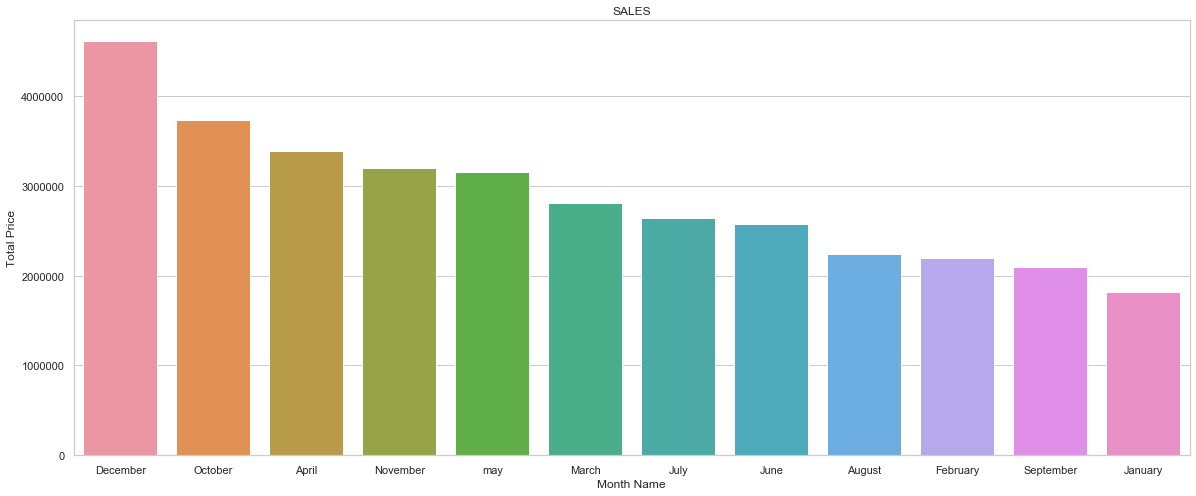

In [229]:
plt.figure(figsize=(20,8))
sns.barplot(x=sale.index , y="Total Price" ,data=sale)
plt.title("SALES")

#### 2- What city had the highest number of sales ?

In [230]:
# Here Adding new column of city

extract=data["Purchase Address"].str.split(",") # making an array lidt
city=extract.str[1] #getting city from the list array
state=extract.str[2] #getting state from the list array
state=state.str.split(" ") #splitting the code and states "it includes the space"
final=state.str[1]  #extracting the states again

CITY=city + " " + final #rejoining the data
CITY

data["City"]=CITY # adding the new column
data





,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Month,Month Name,City
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.000000,1,January,Boston MA
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.950000,1,January,Portland OR
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.980000,1,January,San Francisco CA
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.990005,1,January,Los Angeles CA
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.990000,1,January,Austin TX
...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.950000,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.950000,12,December,San Francisco CA
25113,319667,AA Batteries (4-pack),2,3.840000,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.680000,12,December,Los Angeles CA
25114,319668,Vareebadd Phone,1,400.000000,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.000000,12,December,Seattle WA
25115,319669,Wired Headphones,1,11.990000,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.990000,12,December,Dallas TX


In [231]:
#Answer 
City_sales=data.groupby("City").sum()
City_sales.sort_values(by="Total Price",ascending=False)

,Quantity Ordered,Price Each,Total Price,Month
City,,,,
San Francisco CA,50239,8211461.500,8.262204e+06,315520
Los Angeles CA,33289,5421435.000,5.452571e+06,208325
New York City NY,27932,4635371.000,4.664318e+06,175741
Boston MA,22528,3637409.750,3.661642e+06,141112
Atlanta GA,16602,2779908.250,2.795498e+06,104794
Dallas TX,16730,2752627.750,2.767976e+06,104620
Seattle WA,16553,2733296.000,2.747756e+06,104941
Portland OR,11303,1860558.250,1.870732e+06,70621
Austin TX,11153,1809873.625,1.819582e+06,69829


Text(0.5, 0, 'CITY')

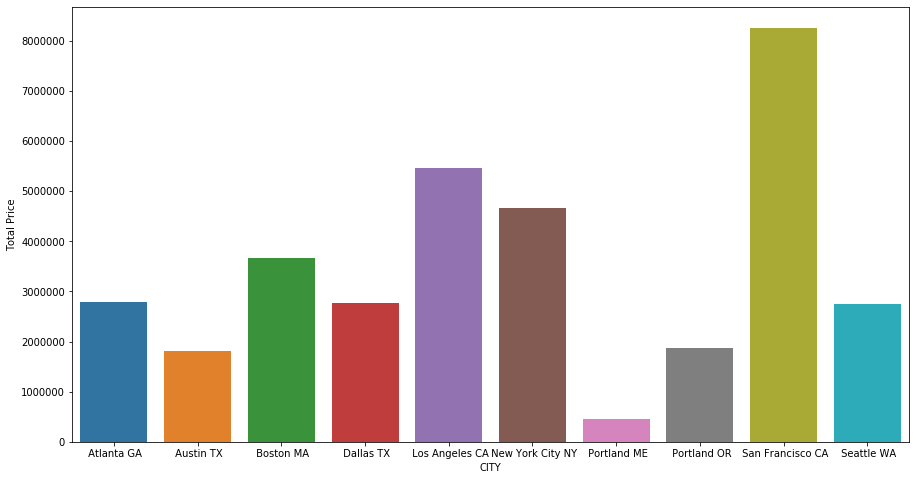

In [23]:
#PlOTTING  Graph

plt.figure(figsize=(15,8))
sns.barplot(x=City_sales.index , y="Total Price" , data=City_sales )
plt.xlabel("CITY")

### 3Q What time should we display Ads to Maximize likelihood of customer's buying product ?

In [232]:
# Creating a new column Hour by extracting the values
data.dtypes
data
data["Hour"]=pd.DatetimeIndex(data["Order Date"]).hour
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Month,Month Name,City,Hour
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.000000,1,January,Boston MA,21
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.950000,1,January,Portland OR,14
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.980000,1,January,San Francisco CA,13
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.990005,1,January,Los Angeles CA,20
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.990000,1,January,Austin TX,11
...,...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.950000,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.950000,12,December,San Francisco CA,20
25113,319667,AA Batteries (4-pack),2,3.840000,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.680000,12,December,Los Angeles CA,12
25114,319668,Vareebadd Phone,1,400.000000,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.000000,12,December,Seattle WA,6
25115,319669,Wired Headphones,1,11.990000,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.990000,12,December,Dallas TX,10


In [235]:
time=data.groupby('Hour').count().iloc[:,1]
time=time.to_frame().reset_index() #converting series into dataframe
time


,Hour,Product
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


([<matplotlib.axis.XTick at 0x273b33346c8>,
 <a list of 24 Text xticklabel objects>)

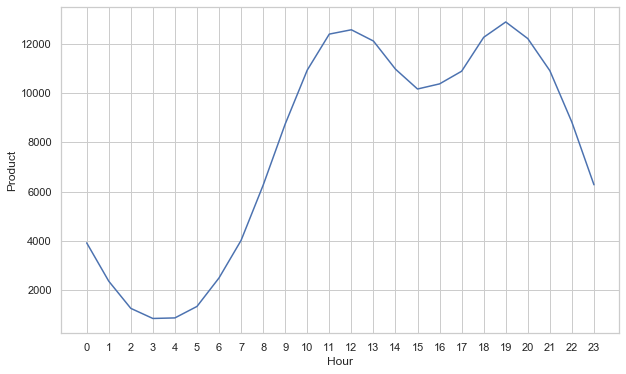

In [244]:
import numpy as np
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.lineplot(x="Hour" ,y= "Product",markers='0', data=time)
plt.xticks(np.arange(0,24,1)) # giving the range for it by numpy function np.arange


### What Products are most often sold together ?

In [30]:
data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Month,Month Name,City,Hour
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.000000,1,January,Boston MA,21
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.950000,1,January,Portland OR,14
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.980000,1,January,San Francisco CA,13
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.990005,1,January,Los Angeles CA,20
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.990000,1,January,Austin TX,11


In [64]:
duplicate=data[data["Order ID"].duplicated(keep=False)] #use to show duplicate values , keep is the parameter
duplicate
duplicate['Grouped'] = duplicate.groupby('Order ID')['Product'].transform(lambda x: ','  .join(x)) #one of the most typical function
duplicate



C:\Users\Frac\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,Month,Month Name,City,Hour,Grouped
41,141275,USB-C Charging Cable,1,11.95000,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",11.95000,1,January,Austin TX,16,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99000,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",11.99000,1,January,Austin TX,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00000,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",150.00000,1,January,Los Angeles CA,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84000,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",11.52000,1,January,Los Angeles CA,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00000,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",400.00000,1,January,New York City NY,11,"Vareebadd Phone,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...,...
25028,319584,Wired Headphones,1,11.99000,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",11.99000,12,December,Portland OR,0,"iPhone,Wired Headphones"
25040,319596,iPhone,1,700.00000,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",700.00000,12,December,New York City NY,8,"iPhone,Lightning Charging Cable"
25041,319596,Lightning Charging Cable,1,14.95000,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",14.95000,12,December,New York City NY,8,"iPhone,Lightning Charging Cable"
25076,319631,34in Ultrawide Monitor,1,379.98999,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",379.98999,12,December,Austin TX,22,"34in Ultrawide Monitor,Lightning Charging Cable"


In [266]:
Temp=duplicate[["Order ID","Grouped"]].drop_duplicates()
Temp
#down below is the explanation
sales=Temp.groupby("Grouped").count()
sales #here we get 366 combinations   but here the problem arises that the combinations which are there are not proper
#For eg lets say a list A = [(2,1),(2,4,1)] so what are the combinations here
# answer is (2,1) and (2,4,1) but what are the most no. ccombinations then (2,1) of A group and (2,1)(1,4)(2,4) are of 2nd group
# so repeated is 2,1 for 2 times



,Order ID
Grouped,
"20in Monitor,20in Monitor",3
"20in Monitor,27in FHD Monitor",2
"20in Monitor,34in Ultrawide Monitor",1
"20in Monitor,AA Batteries (4-pack)",6
"20in Monitor,AAA Batteries (4-pack)",3
...,...
"iPhone,USB-C Charging Cable",12
"iPhone,Vareebadd Phone",3
"iPhone,Wired Headphones",361


In [267]:
from itertools import combinations # there is one library which is used to get rid of those issues
from collections import Counter 
import pandas as pd

count = Counter()   #it is important to give the counter

for row in Temp['Grouped']: # Here we decide which column to choose 
    row_list = row.split(',') # as we knw used to split into the list
    count.update(Counter(combinations(row_list, 2))) # 2 is the parameter of the combinations which tells how many combinations user needs
count1=count #after that we again store the variable
count1
countresult=result=pd.DataFrame.from_dict(count1, orient='index') # the dictionary now is converted into dataframe , for orient check the parameters by shift+Tab
countresult=countresult.rename(columns={0:"No.of times"}) # changing the name
final=countresult.sort_values(by="No.of times" , ascending=False).iloc[0:10,:]
final


,index,No.of times
11,"(iPhone, Lightning Charging Cable)",1005
3,"(Google Phone, USB-C Charging Cable)",987
7,"(iPhone, Wired Headphones)",447
17,"(Google Phone, Wired Headphones)",414
14,"(Vareebadd Phone, USB-C Charging Cable)",361
5,"(iPhone, Apple Airpods Headphones)",360
4,"(Google Phone, Bose SoundSport Headphones)",220
0,"(USB-C Charging Cable, Wired Headphones)",160
2,"(Vareebadd Phone, Wired Headphones)",143
10,"(Lightning Charging Cable, Wired Headphones)",92


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

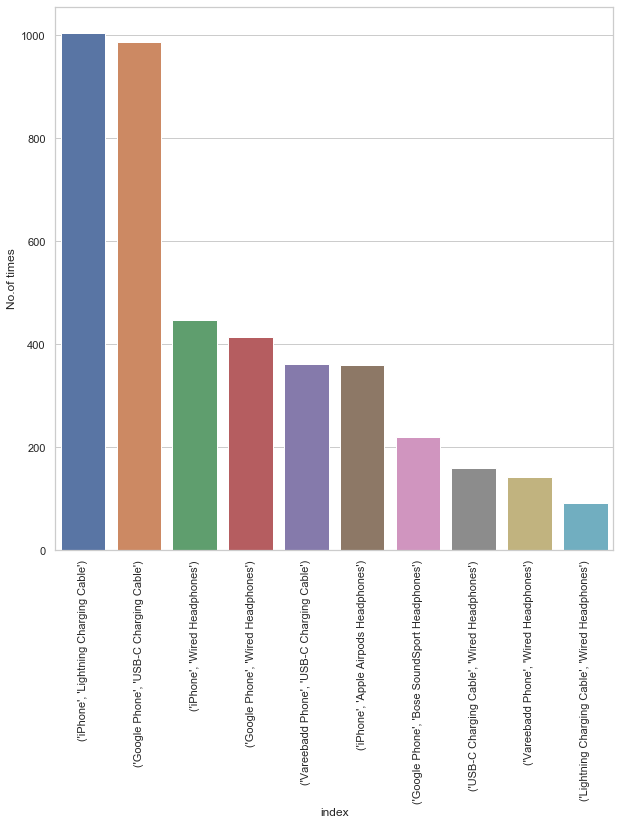

In [219]:
plt.figure(figsize=(10,10))
sns.barplot(x="index" , y="No.of times",data=final)
plt.xticks( rotation=90)


## So what we have learned from this project :

1st importing all the necessary libararies

2nd cleansing of the data

3rd Changing the datatype and adding necessary column

4th Split "with str" and Transform "with Join function"] function, duplicated and drop_duplicates function

5th Xtics and Ytics with np arange

6th Now most important is new library for combinations
  from itertools import combinations
from collections import Counter 

7nth - result=pd.DataFrame.from_dict(count1, orient='index').from_dict(count1, orient='index').reset_index() 

count = Counter()   #it is important to give the counter

for row in data['Grouped']:     
    row_list = row.split(',') # as we knw used to split into the list
    count.update(Counter(combinations(row_list, 2)))
